# ORCA2 Offline forcing files

In [1]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [2]:
# nonlinear colormap, borrowed from Robert Hetland <hetland@tamu.edu>, under MIT license.
# http://protracted-matter.blogspot.ca/2012/08/nonlinear-colormap-in-matplotlib.html
from numpy import *
from matplotlib.colors import LinearSegmentedColormap
class nlcmap(LinearSegmentedColormap):
    name = 'nlcmap'    
    def __init__(self, cmap, levels):
        self.cmap = cmap
        self.N = cmap.N
        self.monochrome = self.cmap.monochrome
        self.levels = asarray(levels, dtype='float64')
        self._x = self.levels / self.levels.max()
        self._y = linspace(0.0, 1.0, len(self.levels))
    def __call__(self, xi, alpha=1.0, **kw):
        """docstring for fname"""
        yi = interp(xi, self._x, self._y)
        return self.cmap(yi, alpha)

In [3]:
name=glob.glob('_data/NEMO/INPUT_DYNA/*')
NC = nc.Dataset(name[0]) 

In [4]:
NC.variables['iowaflup'][:].shape

(73L, 149L, 182L)

In [5]:
ice_cover = NC.variables['soicecov'][:]
i2o= NC.variables['iowaflup'][:]
nav_lat = NC.variables['nav_lat'][:]
nav_lon = NC.variables['nav_lon'][:]

In [6]:
i2o.shape

(73L, 149L, 182L)

In [20]:
i2o[1:10, 127, 98]

array([ 0.00047868,  0.0002718 ,  0.00022074,  0.00025127,  0.00021585,
        0.00015914,  0.00014624,  0.00019354,  0.00016941], dtype=float32)

# Sea-ice cover

In [6]:
ice_cover_lev = [0.1, 0.4, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.975, 1.0]
CMap = nlcmap(plt.cm.gist_ncar_r, ice_cover_lev)

In [7]:
def draw_ice_cov(nav_lon, nav_lat, ice_cover, lev, CMap, ax, title):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y = proj(nav_lon, nav_lat)
    CS = proj.contourf(x, y, ice_cover, lev, cmap=CMap)
    proj.plot(x.T, y.T, 'k-', lw=0.1); proj.plot(x, y, 'k-', lw=0.1)
    ax.set_title(title, fontsize=12, y=1.025)
    return CS

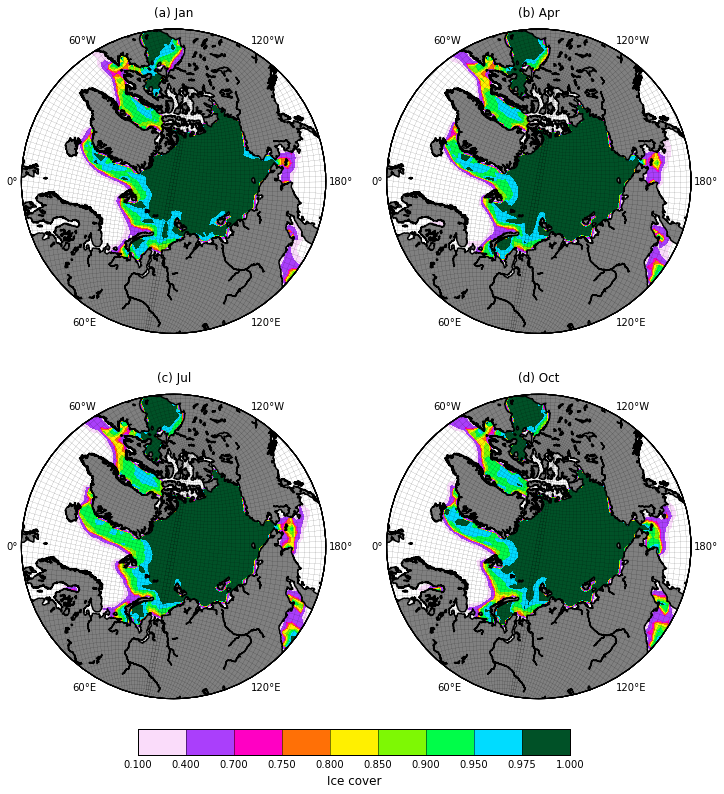

In [8]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
#
draw_ice_cov(nav_lon, nav_lat, ice_cover[0, :, :], ice_cover_lev, CMap, ax1, '(a) Jan')
draw_ice_cov(nav_lon, nav_lat, ice_cover[3, :, :], ice_cover_lev, CMap,ax2, '(b) Apr')
draw_ice_cov(nav_lon, nav_lat, ice_cover[6, :, :], ice_cover_lev, CMap,ax3, '(c) Jul')
CS = draw_ice_cov(nav_lon, nav_lat, ice_cover[9, :, :], ice_cover_lev, CMap,ax4, '(d) Oct')
#
cax  = fig.add_axes([0.26, 0.06, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Ice cover', fontsize=12)
CBar.ax.tick_params(axis='x', length=26)
CBar.set_ticks(ice_cover_lev)

# Ice to ocean net freshwater

In [18]:
i2o.max()

0.0017244543

In [33]:
i2o_lev = np.array([-1.5, -1, -0.5, -0.25, 0.25, 0.5, 1, 1.5])*1e-4
CMap = plt.cm.RdBu

In [34]:
def draw_i2o(nav_lon, nav_lat, i2o, lev, CMap, ax, title):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y = proj(nav_lon, nav_lat)
    CS = proj.contourf(x, y, i2o, lev, cmap=CMap, extend='both')
    proj.plot(x.T, y.T, 'k-', lw=0.1); proj.plot(x, y, 'k-', lw=0.1)
    ax.set_title(title, fontsize=12, y=1.025)
    return CS

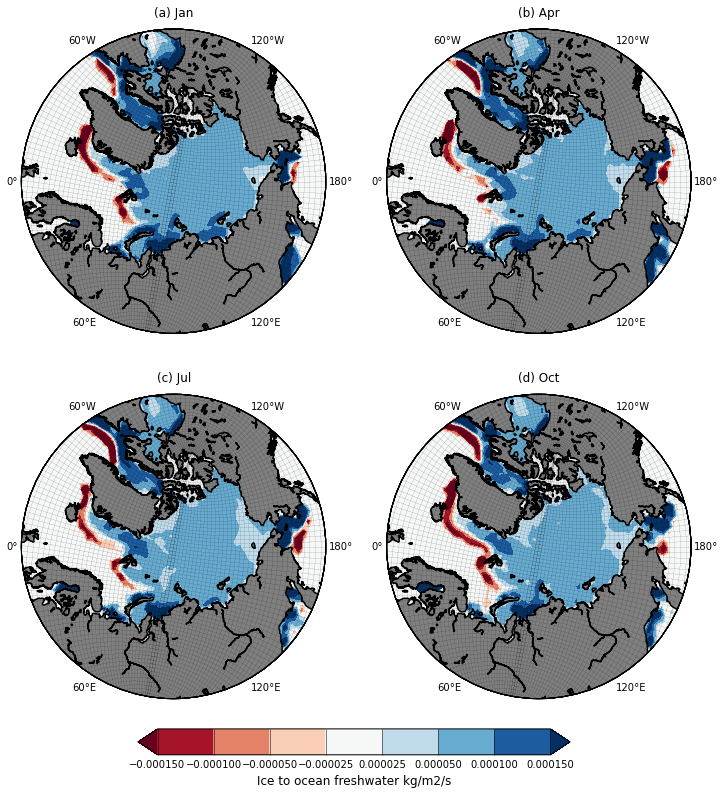

In [35]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
#
draw_i2o(nav_lon, nav_lat, i2o[0, :, :], i2o_lev, CMap, ax1, '(a) Jan')
draw_i2o(nav_lon, nav_lat, i2o[3, :, :], i2o_lev, CMap, ax2, '(b) Apr')
draw_i2o(nav_lon, nav_lat, i2o[6, :, :], i2o_lev, CMap, ax3, '(c) Jul')
CS = draw_i2o(nav_lon, nav_lat, i2o[9, :, :], i2o_lev, CMap,ax4, '(d) Oct')
#
cax  = fig.add_axes([0.26, 0.06, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Ice to ocean freshwater kg/m2/s', fontsize=12)
CBar.ax.tick_params(axis='x', length=26)
CBar.set_ticks(i2o_lev)